In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pysam
import numpy as np
import cPickle as pickle
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from collections import Counter

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

In [5]:
import random

def assign_color():
    
    return (random.random() , random.random(), random.random())

In [6]:
def fastq_to_names(in_file):
    with open(in_file) as fq:
        content = fq.readlines()
    
    names = []
    for line in content:
        if 'L183:338:CAGAAANXX' in line:
            names.append(line.rstrip()[1:])
    
    return names

In [7]:
def umi_to_umis(in_file):
    with open(in_file) as fu:
        content = fu.readlines()
    
    umis = []
    for line in content:
        umis.append(line.rstrip())
    
    return umis

In [8]:
names = fastq_to_names('/data/parastou/UMI/data/HG/RawReads/HGsample_AATGTA.fastq')
umis = umi_to_umis('/data/parastou/UMI/data/HG/RawReads/HGsample_AATGTA.umi')

In [9]:
print len(umis)
print len(set(umis))

538853
29291


In [12]:
XN = pd.DataFrame(zip(names,umis), columns=['QName','XM'])

In [13]:
isolated = []

for xm, group in XN.groupby(['XM']):
    if len(group) == 1:
        isolated.append(group['QName'].item())

In [14]:
st = pysam.AlignmentFile('/data/parastou/Star-Lab/test/NStar25.Aligned.out.tagged.bam','rb')
reads = st.fetch(until_eof=True)

In [15]:
st.reset()
reads = st.fetch(until_eof=True)

In [16]:
all_nh = []
for r in reads:
    if r.has_tag('NH'):
        all_nh.append((r.query_name,r.get_tag('NH')))

In [17]:
df1 = pd.DataFrame(isolated, columns=['QN'])
df2 = pd.DataFrame(all_nh, columns=['QN','NH'])
df3 = df2.drop_duplicates()

In [18]:
i1 = pd.merge(df1, df3, how='inner', on=['QN'])

In [19]:
i1

,QN,NH
0,L183:338:CAGAAANXX:5:1110:18171:62388,1
1,L183:338:CAGAAANXX:4:1102:11051:44584,9
2,L183:338:CAGAAANXX:4:1106:13313:75109,1
3,L183:338:CAGAAANXX:5:2307:2467:59838,2
4,L183:338:CAGAAANXX:4:1113:3516:98348,2
5,L183:338:CAGAAANXX:5:1108:6038:52737,14
6,L183:338:CAGAAANXX:6:2214:16765:26530,15
7,L183:338:CAGAAANXX:5:2303:16454:96906,0
8,L183:338:CAGAAANXX:5:1304:15896:95801,763
9,L183:338:CAGAAANXX:4:1315:1989:50323,0


In [20]:
lost_nh = [i.item() for i in i1['NH']]

In [21]:
data = sorted(Counter(lost_nh).items())
data1 = [i for i,j in data]
data2 = [j for i,j in data]

In [22]:
lost_mm = [j for i,j in data[2:]]

In [120]:
sum(lost_mm)

11862

In [23]:
len(lost_mm)

484

In [24]:
all_maps = [i.item() for i in df3['NH']]

In [25]:
multi_maps = [i.item() for i in df3['NH'] if not i.item() == 1]

In [26]:
print sum(all_maps) - sum(multi_maps)
print sum(multi_maps)

64881
6520798


In [27]:
print len(all_maps) - len(multi_maps)
print len(multi_maps)

64881
473972


In [28]:
print (float(484) / 473972) * 100

0.102115736795


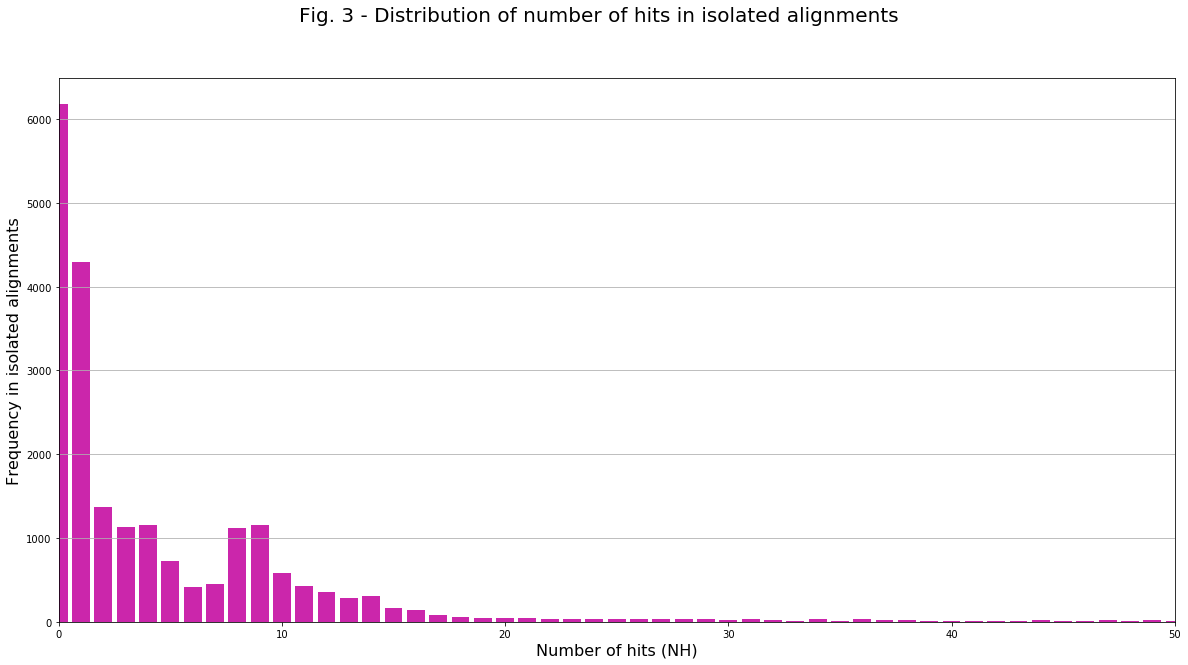

In [112]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Fig. 3 - Distribution of number of hits in isolated alignments', fontsize=20)

plt.xlim(0, 50)
#plt.xticks(range(0,35,5))
ax = plt.subplot(1, 1, 1)
ax.yaxis.grid()
ax.set_xlabel('Number of hits (NH)', fontsize=16)
ax.set_ylabel('Frequency in isolated alignments', fontsize=16)
ax.bar(data1, data2, width=.8, color=assign_color(), align='center')
#plt.show()
plt.savefig('/home/parastou/HGdist5')

In [20]:
cnt = []

for xm, group in XN.groupby(['XM']):
    cnt.append(len(group))
data = sorted(Counter(cnt).items())
data1 = [i for i,j in data]
data2 = [j for i,j in data]

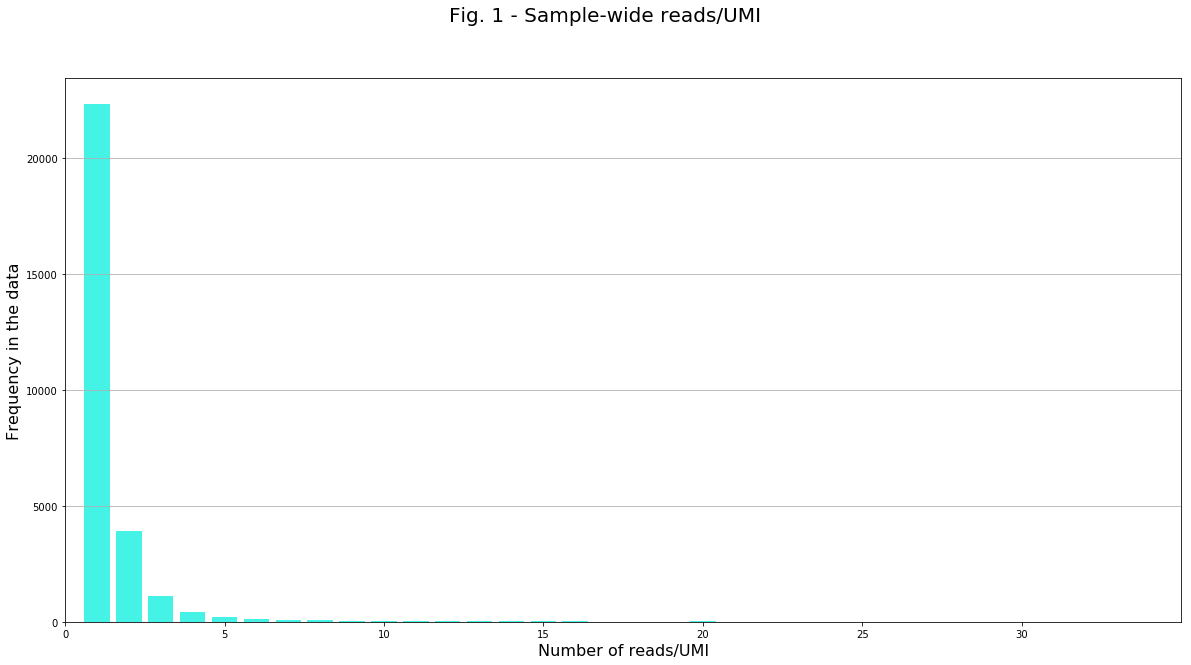

In [54]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Fig. 1 - Sample-wide reads/UMI', fontsize=20)

plt.xlim(0, 35)
plt.xticks(range(0,35,5))
ax = plt.subplot(1, 1, 1)
ax.yaxis.grid()
ax.set_xlabel('Number of reads/UMI', fontsize=16)
ax.set_ylabel('Frequency in the data', fontsize=16)
ax.bar(data1, data2, width=.8, color=assign_color(), align='center')
#plt.show()
plt.savefig('/home/parastou/HGdist1')

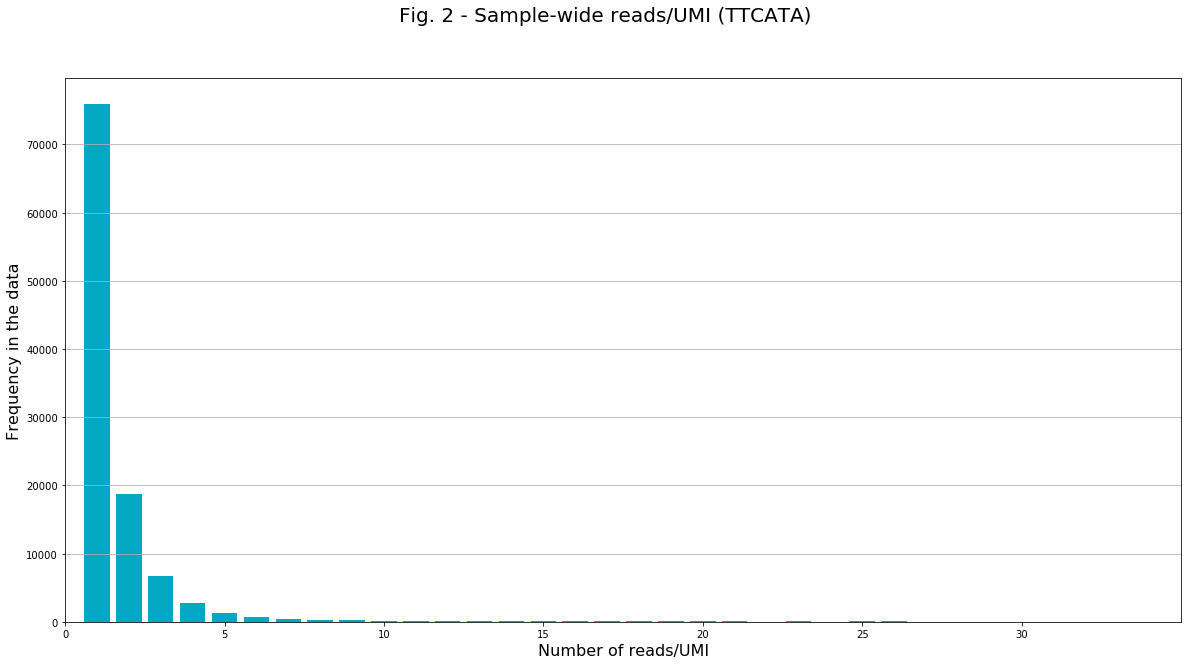

In [57]:
names = fastq_to_names('/data/parastou/UMI/data/HG/RawReads/HGsample_TTCATA.fastq')
umis = umi_to_umis('/data/parastou/UMI/data/HG/RawReads/HGsample_TTCATA.umi')
XN = pd.DataFrame(zip(names,umis), columns=['QName','XM'])

cnt = []

for xm, group in XN.groupby(['XM']):
    cnt.append(len(group))
data = sorted(Counter(cnt).items())
data1 = [i for i,j in data]
data2 = [j for i,j in data]

fig = plt.figure(figsize=(20,10))
fig.suptitle('Fig. 2 - Sample-wide reads/UMI (TTCATA)', fontsize=20)

plt.xlim(0, 35)
plt.xticks(range(0,35,5))
ax = plt.subplot(1, 1, 1)
ax.yaxis.grid()
ax.set_xlabel('Number of reads/UMI', fontsize=16)
ax.set_ylabel('Frequency in the data', fontsize=16)
ax.bar(data1, data2, width=.8, color=assign_color(), align='center')
#plt.show()
plt.savefig('/home/parastou/HGDist4')